In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1048\3483326838.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [5]:
df=pd.read_csv("C:\\Users\\LENOVO\\Downloads\\USvideos.csv")

In [6]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [7]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x1efa8b7e550>,
 'caps': [<matplotlib.lines.Line2D at 0x1efa914c850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efa8b7c690>],
 'medians': [<matplotlib.lines.Line2D at 0x1efa8d78350>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efa8d7b310>],
 'means': []}

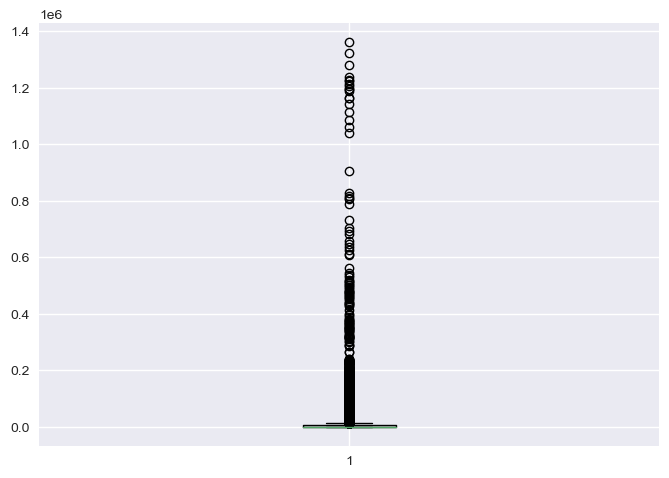

In [8]:
plt.boxplot(df.comment_count)

In [9]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [13]:
q1=df.likes.quantile(0.25)
q3=df.likes.quantile(0.75)
IQR_likes=q1-q3

In [10]:
df.shape


(40949, 16)

In [14]:
#Checking for any outliers
df=df[~(df.likes < (q1-1.5*IQR_likes)) | (df.likes > (q3+1.5*IQR_likes))]
df.shape

(40949, 16)

(array([4.0366e+04, 3.6800e+02, 1.2700e+02, 3.9000e+01, 1.7000e+01,
        1.2000e+01, 7.0000e+00, 4.0000e+00, 4.0000e+00, 5.0000e+00]),
 array([5.49000000e+02, 2.25216864e+07, 4.50428238e+07, 6.75639612e+07,
        9.00850986e+07, 1.12606236e+08, 1.35127373e+08, 1.57648511e+08,
        1.80169648e+08, 2.02690786e+08, 2.25211923e+08]),
 <BarContainer object of 10 artists>)

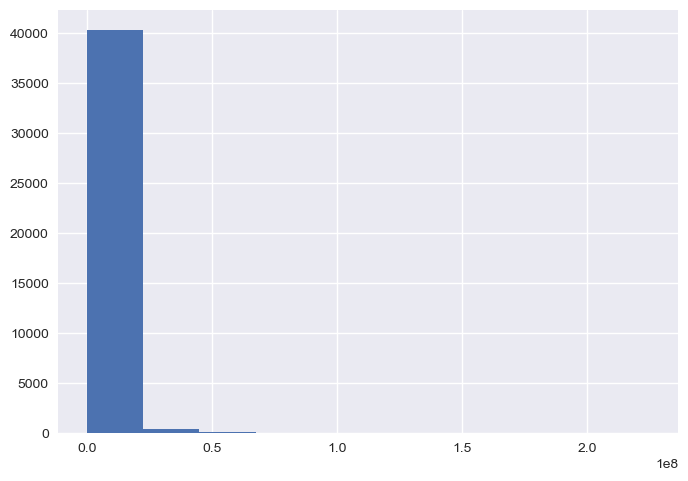

In [15]:
plt.hist(df.views)


(array([ 2729.,     0.,  6472.,  3094.,  1219., 23264.,  4114.,     0.,
            0.,    57.]),
 array([ 1. ,  5.2,  9.4, 13.6, 17.8, 22. , 26.2, 30.4, 34.6, 38.8, 43. ]),
 <BarContainer object of 10 artists>)

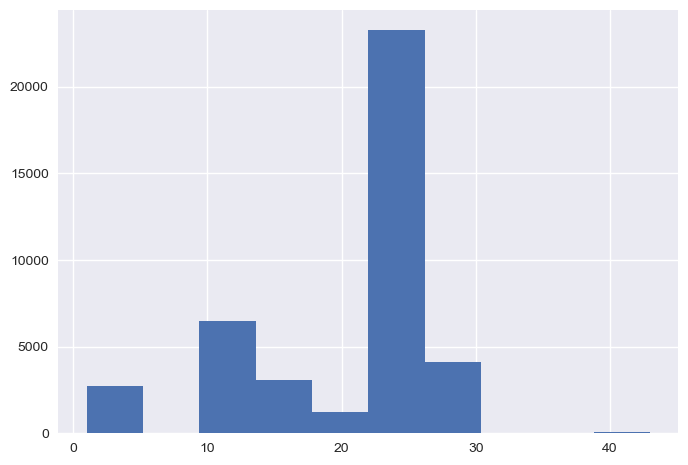

In [16]:
plt.hist(df.category_id)

{'whiskers': [<matplotlib.lines.Line2D at 0x1efa9808110>,
 'caps': [<matplotlib.lines.Line2D at 0x1efa9809910>,
 'boxes': [<matplotlib.lines.Line2D at 0x1efa97cb210>],
 'medians': [<matplotlib.lines.Line2D at 0x1efa980af10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1efa980b910>],
 'means': []}

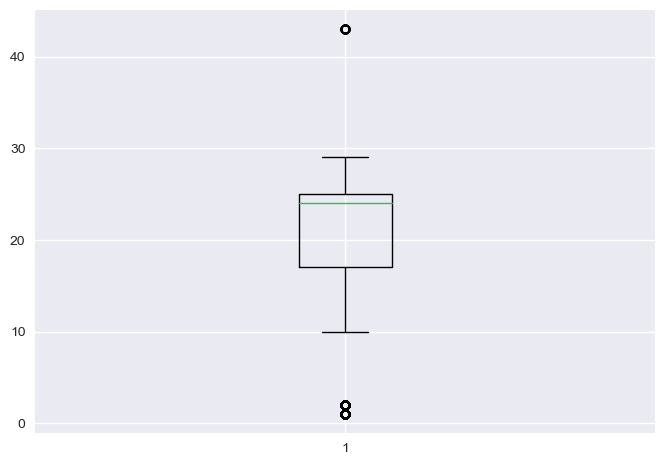

In [17]:
plt.boxplot(df.category_id)

In [18]:
q1=df.category_id.quantile(0.25)
q3=df.category_id.quantile(0.75)
IQR_category_id=q1-q3
df.shape

(40949, 16)

In [19]:
df=df[~(df.category_id < (q1-1.5*IQR_category_id)) | (df.likes > (q3+1.5*IQR_category_id))]
df.shape

(40558, 16)

(array([4.0475e+04, 5.9000e+01, 1.0000e+01, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 6.0000e+00]),
 array([      0.,  167442.,  334884.,  502326.,  669768.,  837210.,
        1004652., 1172094., 1339536., 1506978., 1674420.]),
 <BarContainer object of 10 artists>)

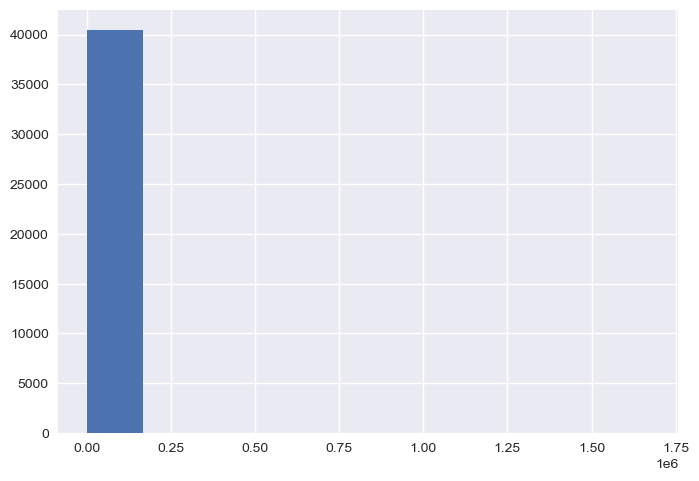

In [20]:
plt.hist(df.dislikes)

{'bodies': [<matplotlib.collections.PolyCollection at 0x1efa98e2490>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1efa8e69110>,
 'cmins': <matplotlib.collections.LineCollection at 0x1efa9844ad0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1efa98fcfd0>}

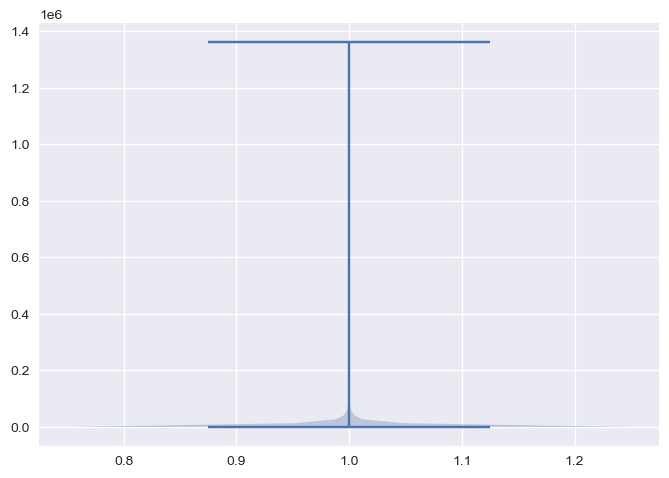

In [21]:
plt.violinplot(df.comment_count)

In [22]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [23]:
df.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1048\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.170411,-0.174967,-0.033767,-0.076747,0.052617,0.011839,-0.030711
views,-0.170411,1.000000,0.853907,0.474680,0.620912,-0.008079,-0.003178,-0.001699
likes,-0.174967,0.853907,1.000000,0.447049,0.802964,-0.024232,-0.003240,-0.002136
dislikes,-0.033767,0.474680,0.447049,1.000000,0.700133,-0.001872,-0.001276,-0.001692
comment_count,-0.076747,0.620912,0.802964,0.700133,1.000000,-0.025843,-0.002252,-0.003461
comments_disabled,0.052617,-0.008079,-0.024232,-0.001872,-0.025843,1.000000,0.087146,-0.002594
ratings_disabled,0.011839,-0.003178,-0.003240,-0.001276,-0.002252,0.087146,1.000000,-0.000226
video_error_or_removed,-0.030711,-0.001699,-0.002136,-0.001692,-0.003461,-0.002594,-0.000226,1.000000
